# OpenDataCube installation 
## AWS Workspace within Asia Pacific 2 Region - Sydney

### Confirm OS, database and datacube-core versions

In [1]:
!lsb_release -d

Description:	Amazon Linux release 2 (Karoo)


In [2]:
!postgres --version

postgres (PostgreSQL) 12.3


In [3]:
!datacube --version

Open Data Cube core, version 1.8.3


### Initialise datacube database

In [4]:
!dropdb datacube
!createdb datacube

* Prepare a datacube database configuration file as below in the HOME or ~/ directory

In [5]:
!cat ~/.datacube.conf

[datacube]
db_hostname:
db_port: 5432
db_database: datacube


* initialise the database with the datacube schema

In [6]:
!datacube system init

Initialising database...
Created.
Checking indexes/views.
Done.


## Configuring datasets

** https://datacube-core.readthedocs.io/en/latest/ops/dataset_documents.html

### Core concepts - Product

* Product - description or specification that describes how a dataset is constructed eg. Sentinel 2 Analysis Ready Data

### Core concepts - Dataset

* Dataset - instantiation / instance of a product eg. representing an acquisition eg. Sentinel 2 Analysis Ready Data acquired over point x/y at time t

### Core concepts of configuration - UUID

* Unique identifiers are used to identify datasets. Datasets are described in a dataset configuration YAML document.

In [9]:
import get_uuid

In [11]:
help(get_uuid)

Help on module get_uuid:

NAME
    get_uuid

FUNCTIONS
    odc_uuid(algorithm:str, algorithm_version:str, sources:Sequence[uuid.UUID], deployment_id:str='', **other_tags) -> uuid.UUID
        Generate deterministic UUID for a derived Dataset
        
        :param algorithm: Name of the algorithm
        :param algorithm_version: Version string of the algorithm
        :param sources: Sequence of input Dataset UUIDs
        :param deployment_id: Some sort of identifier for installation that performs
                              the run, for example Docker image hash, or dea module version on NCI.
        :param **other_tags: Any other identifiers necessary to uniquely identify dataset

DATA
    ODC_NS = UUID('6f34c6f4-13d6-43c0-8e4e-42b6c13203af')

FILE
    /home/odc-workspace/code/aogeodh-odc-demo/get_uuid.py




### Core concepts of configuration - YAML

* YAML is a human readable data-serialisation language used for configuration file s and in applications hwre dat is being stored or transmitted. 

## What do we have available in AOGEODH?

** http://aogeo-ips.s3-website-ap-southeast-2.amazonaws.com

In [85]:
import geopandas
aoi = geopandas.read_file('aoi/mygeodata_merged.json')

In [86]:
aoi

,Name,altitudeMode,Area,Country,FID,Shape_Leng,ISO_3digit,Changes,Field_1,Area_km,GRIDCODE,ID,geometry
0,WSM,clampToGround,134383,Samoa,0,14.110406,WSM,,WSM,None,None,None,"MULTIPOLYGON (((-173.74667 -11.03806, -173.854..."
1,Kangchenjunga Landscape,clampToGround,25080.76,None,0,None,None,None,1,25081,0,1,"MULTIPOLYGON (((87.99272 26.37003, 87.99242 26..."
2,Mekong River Delta,clampToGround,40038,None,0,None,None,None,0,None,None,0,"MULTIPOLYGON (((104.83828 8.70494, 104.83710 8..."


In [88]:
import folium

m = folium.Map(
    location=[-59.1759, -11.6016],
    tiles='Stamen Terrain',
    zoom_start=1  # Limited levels of zoom for free Mapbox tiles.
)

folium.GeoJson(
    aoi,
    name='geojson'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [14]:
# Expand example datasets to avoid the tgz / and other nasty bits of file handling.

## Datacube commands

In [17]:
from datacube import Datacube

In [23]:
import geopandas

In [24]:
!datacube product add alos_palsar_mosaic.yaml

Adding "alos_palsar_mosaic" (this might take a while) DONE


In [29]:
!datacube product list

alos_palsar_mosaic  ALOS/PALSAR and ALOS-2/PALSAR-2 annual mosaic tiles generated for use in the Data Cube - 25m pixel spacing, WGS84. These tiles are derived from the orignal JAXA mosaics with conversion to GeoTIFF.


In [34]:
!wget https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/vectors/AOGEO%20Map%20data.zip

--2020-10-19 15:51:30--  https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/vectors/AOGEO%20Map%20data.zip
Resolving aogeo-ips.s3-ap-southeast-2.amazonaws.com (aogeo-ips.s3-ap-southeast-2.amazonaws.com)... 52.95.132.246
Connecting to aogeo-ips.s3-ap-southeast-2.amazonaws.com (aogeo-ips.s3-ap-southeast-2.amazonaws.com)|52.95.132.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 887362 (867K) [application/zip]
Saving to: ‘AOGEO Map data.zip’

100%[======================================>] 887,362     --.-K/s   in 0.01s   

2020-10-19 15:51:30 (74.4 MB/s) - ‘AOGEO Map data.zip’ saved [887362/887362]



In [57]:
from matplotlib import pyplot
import rasterio
src = rasterio.open('https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/jaxa/jaxa_jsar_mosaic_1/mekongdelta/1998/N10E100_J98_MOS/N10E104_J98_sl_HH')
src

<open DatasetReader name='https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/jaxa/jaxa_jsar_mosaic_1/mekongdelta/1998/N10E100_J98_MOS/N10E104_J98_sl_HH' mode='r'>

In [58]:
src.bounds

BoundingBox(left=104.0, bottom=9.0, right=105.0, top=10.0)

In [59]:
src.transform

Affine(0.00022222222222222223, -0.0, 104.0,
       -0.0, -0.00022222222222222223, 10.0)

In [60]:
src.crs

CRS.from_epsg(4326)

In [61]:
src.driver

'ENVI'

In [62]:
src.files

['/vsicurl/https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/jaxa/jaxa_jsar_mosaic_1/mekongdelta/1998/N10E100_J98_MOS/N10E104_J98_sl_HH',
 '/vsicurl/https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/jaxa/jaxa_jsar_mosaic_1/mekongdelta/1998/N10E100_J98_MOS/N10E104_J98_sl_HH.hdr']

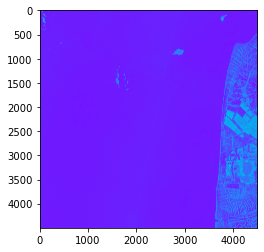

In [64]:
pyplot.imshow(src.read(1), cmap='rainbow')

In [65]:
src = rasterio.open('https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/cnsa/cnsa_gf1wfv_l1a_1/mekong/2019/GF1_WFV3_E106.0_N10.5_20190122_L1A0003780351/GF1_WFV3_E106.0_N10.5_20190122_L1A0003780351.tiff')

RasterioIOError: MissingRequired:TIFF directory is missing required "ImageLength" field

In [66]:
src = rasterio.open('https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/jamstec/Ichii_et_al_JGR_2017/SPATIAL/8DAY/NEE.ALL.STDEV.2015.bsq.flt')

RasterioIOError: '/vsicurl/https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/jamstec/Ichii_et_al_JGR_2017/SPATIAL/8DAY/NEE.ALL.STDEV.2015.bsq.flt' not recognized as a supported file format.

In [68]:
src = rasterio.open('https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/kari/Mekong/K3_20130415062400_04860_07441078_L1G/K3_20130415062400_04860_07441078_L1G_R.tif')

In [73]:
# ZIP direct read example

In [72]:
src = rasterio.open('zip+https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/kari/Mekong/K3_20130415062400_04860_07441078_L1G.zip!K3_20130415062400_04860_07441078_L1G_R.tif')

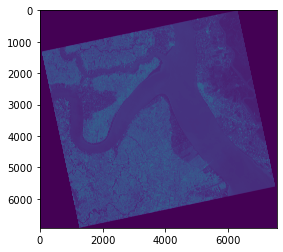

In [74]:
pyplot.imshow(src.read(1), cmap='viridis')

In [76]:
src.bounds

BoundingBox(left=678442.6282229144, bottom=1147289.930470855, right=699554.6282229144, top=1166665.930470855)

In [77]:
src = rasterio.open('https://aogeo-ips.s3-ap-southeast-2.amazonaws.com/esa/esa_s2m_l2a/samoa/2/L/LK/2020/1/S2A_2LLK_20200110_0_L2A/B01.tif')

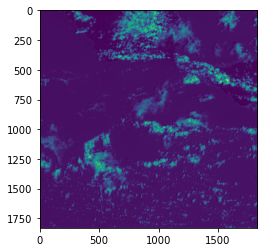

In [78]:
pyplot.imshow(src.read(1), cmap='viridis')